# Visualize some part of the dataset

###  &emsp;&emsp;&emsp;By Reham Metwally Maree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('twitter_archive_master.csv')

## Insight 1 :
    The `golden_retriever` dog type is the most common dog that has been rated.

In [3]:
dog_breed_prediction = df['dog_breed_prediction'].value_counts()

In [4]:
dog_breed_prediction

golden_retriever      173
Labrador_retriever    109
Pembroke              101
Chihuahua              85
pug                    62
                     ... 
standard_schnauzer      1
groenendael             1
silky_terrier           1
EntleBucher             1
Japanese_spaniel        1
Name: dog_breed_prediction, Length: 111, dtype: int64

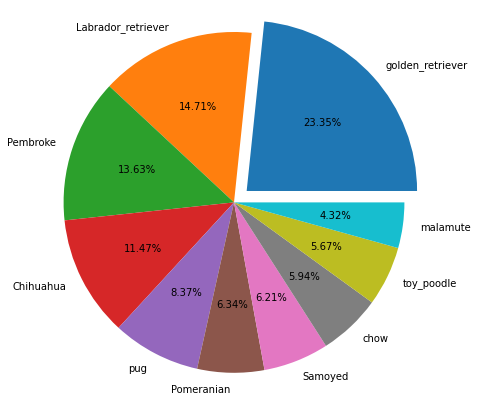

In [5]:
dog_types = dog_breed_prediction.keys()[:10]
dog_types_percent  = dog_breed_prediction[:10]
explode = (0.1,0, 0, 0,0,0,0,0,0,0) 
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(dog_types_percent,explode=explode, labels = dog_types,autopct='%1.2f%%')
ax1.axis('equal')
plt.show()

#### As we see the `golden_retriever` dog type is the most dog that has been rated in the whole dataset and there are dogs types that has just been rated 4 times such as like (`Scotch_terrier`, `groenendael`,`standard_schnauzer`, `clumber`, `EntleBucher`).

## Insight 2 :
    there is a correlation between the number of tweets and the number of favourites it gets.

Text(0.5, 1.0, 'Scatter plot of retweets and scatter plot')

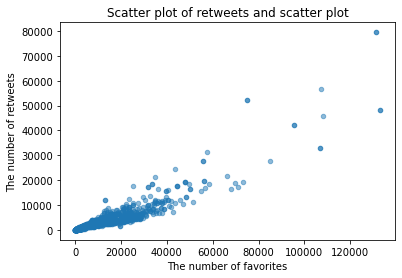

In [6]:
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('The number of favorites')
plt.ylabel('The number of retweets')
plt.title('Scatter plot of retweets and scatter plot')

#### As we can see there is a correlation between the number of retweets and the favoirits for every tweet which shows how humans could react more positevly for the tweets or posts that they likes better .

## Insight 3 :
    The overall average for ratings is 12/10

In [7]:
df['rating_numerator'].value_counts()

12.0     444
10.0     359
11.0     358
13.0     250
9.0      119
8.0       65
14.0      29
7.0       26
5.0       12
6.0       12
4.0        5
3.0        3
27.0       2
24.0       1
75.0       1
165.0      1
1.0        1
84.0       1
88.0       1
44.0       1
60.0       1
2.0        1
26.0       1
99.0       1
50.0       1
80.0       1
45.0       1
121.0      1
Name: rating_numerator, dtype: int64

#### It seems like the most rate has been given to dogs is 12/10 and also that 10/10 is the most second rate has been given.

## Insight 4 :
    There are 1671 people used Twitter for iPhone(98.22%), 20 people used Twitter Web Client(1.30%), and 8 people
    used TweetDeck(0.48%)

In [8]:
tweet_source = df['tweet_source'].value_counts()

In [9]:
tweet_source

Twitter for iPhone    1671
Twitter Web Client      20
TweetDeck                8
Name: tweet_source, dtype: int64

<ipython-input-10-e2c303c94cb9>:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(fig_tweet_source, labels=tweet_source_keys, loc="best")


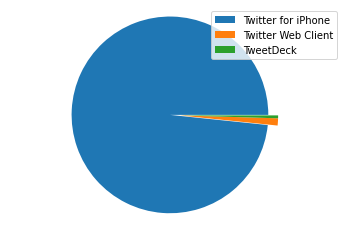

In [10]:
tweet_source_keys = tweet_source.keys()
explode = (0.1,0,0) 
fig_tweet_source, ax_tweet_source = plt.subplots()
ax_tweet_source.pie(tweet_source,explode=explode)
ax_tweet_source.axis('equal')
plt.legend(fig_tweet_source, labels=tweet_source_keys, loc="best")
plt.show()

## Insight 5 :
    Pupper is the most frequent dog stage in the dataset.

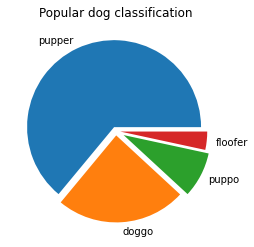

In [11]:
dog_classifications = df[df['dog_classification'] != 'None'].dog_classification.value_counts().sort_values(ascending=False)
figure1, axis1 = plt.subplots()
explode = (0.05, 0.05, 0.1, 0.05) 
axis1.pie(dog_classifications,labels=dog_classifications.keys(),explode = explode)
plt.title("Popular dog classification")
plt.show()

## Insight 6 :
    Cooper and Charlie both have the most number of appearing.

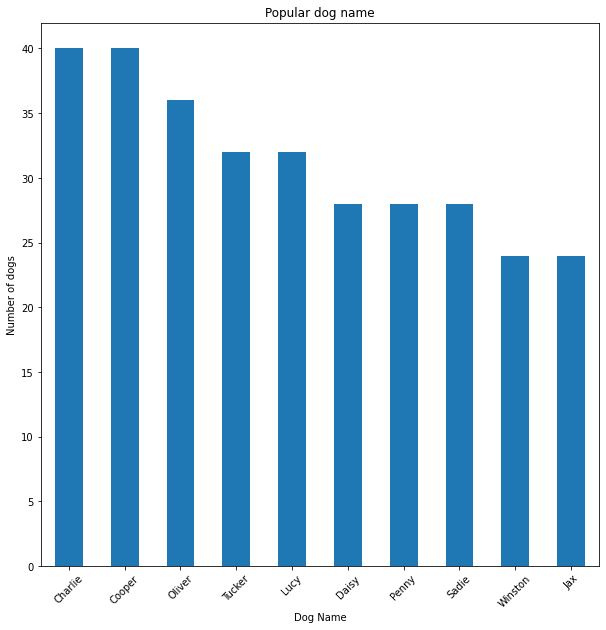

In [13]:
df[df['dog_name'] != 'None'].dog_name.value_counts()[:10].sort_values(ascending=False).plot.bar(figsize=(10,10))
plt.title("Popular dog name")
plt.xticks(rotation=45)
plt.xlabel("Dog Name")
plt.ylabel("Number of dogs")
plt.show()

## Insight 7 :

    Which breed of those popular dogs has the highest average rating.

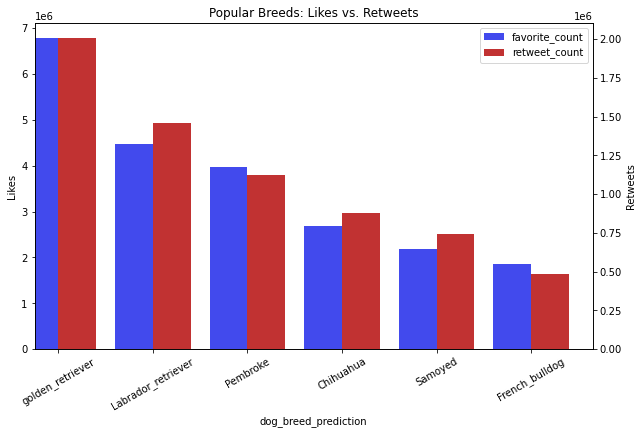

In [14]:
dog_fav = df.groupby('dog_breed_prediction')['favorite_count'].sum().sort_values(ascending=False).head(6)
dog_ret = df.groupby('dog_breed_prediction')['retweet_count'].sum().sort_values(ascending=False).head(6)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

dog_fav.plot(figsize = (10,6), kind='bar', color='#424aed', ax=ax1, width=0.4, position=1, 
             title='Popular Breeds: Likes vs. Retweets')
dog_ret.plot(figsize = (10,6), kind='bar', color='#c13232', ax=ax2, width=0.4, position=0)

ax1.set_ylabel('Likes')
ax2.set_ylabel('Retweets')
ax1.set_xticklabels(dog_fav.index, rotation=30)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)


plt.show()

## Analysing dog classification and ratings

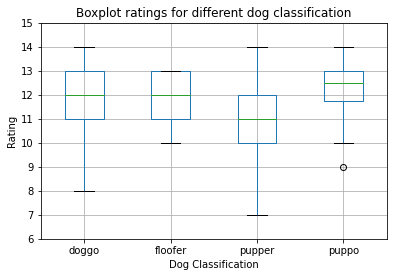

In [15]:
df[df['dog_classification'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_classification'])
plt.ylim((6,15))
plt.title('Boxplot ratings for different dog classification')
plt.xlabel('Dog Classification')
plt.ylabel('Rating')
plt.suptitle('')
plt.show()

#### The box plot indicates that there is more consistency in rating `puppo` dogs high. There is also more consistency in rating the `pupper` dogs less than the others.

## Analysing dog classification and retweets

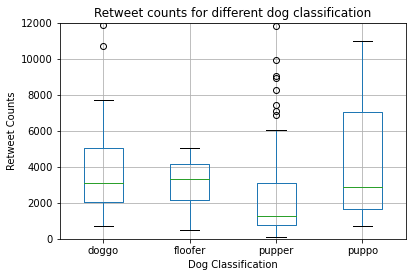

In [16]:
df[df['dog_classification'] != 'None'].boxplot(column = ['retweet_count'], by = ['dog_classification'])
plt.ylim((0,12000))
plt.title('Retweet counts for different dog classification')
plt.xlabel('Dog Classification')
plt.ylabel('Retweet Counts')
plt.suptitle('')
plt.show()

#### `Puppos` were retweeted more than the others on average.

## Analysing dog classification and favourite counts

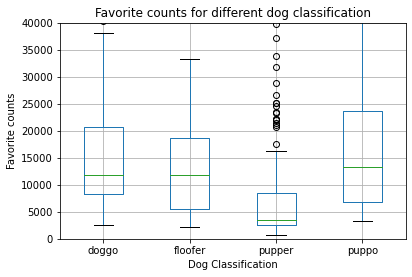

In [17]:
df[df['dog_classification'] != 'None'].boxplot(column = ['favorite_count'], by = ['dog_classification'])
plt.ylim((0,40000))
plt.title('Favorite counts for different dog classification')
plt.xlabel('Dog Classification')
plt.ylabel('Favorite counts')
plt.suptitle('')
plt.show()

#### `Puppos` received more favorite than the others.

# Conclusion :
<br>
    
    - We noticed that the most 10 dog types that has been rated are: golden_retriever , Labrador_retriever, Pembroke 
        , Chihuahua, pug, chow, Samoyed, Pomeranian, toy_poodle, malamute.

    - We also noticed that when the facourites are going higher the retweets getting higher too (positive correlation).
        The regression coefficient for this relationship is strong because people who liked a certain tweet they use to
        engage more with that tweet.

    - We noticed that the most rate has been put for a dog is 12 , and also that there is exist rating with (less than 10).
    
    - There is high consistency in rating puppo dogs. 
    
    - There is also more consistency in rating the pupper dogs less than the others. 
    
    - Puppos were retweeted more than the others and received more favorites also.

    - The Labrador_retriever breed received the maximum number of favourites and retweets.
    
    - The most popular dog type is a pupper.
    
    - The most popular dog, based on image predictions, is a Golden Retriever.
   